In [7]:
import torch
import base64
import io
md = torch.load('/home/wangsheng/Downloads/google_vit-base-patch16-224.bin',map_location=torch.device('cpu'))

In [3]:
len(md)

200

In [5]:
with open("/home/wangsheng/Downloads/google_vit-base-patch16-224.bin", "rb") as file:
    model_content = file.read()
    model_base64 = base64.b64encode(model_content).decode('utf-8')

In [12]:
model_content = base64.b64decode(model_base64)

# 在内存中加载模型
model_buffer = io.BytesIO(model_content)
model = torch.load(model_buffer)

# 获取模型内容的长度（字节数）
model_length_b = len(model_content)
model_length = len(model)
print("模型的长度（字节数）:", model_length_b)
print("模型的层数:", model_length)

模型的长度（字节数）: 346351599
模型的层数: 200


In [16]:
import os
path_ = "/home/wangsheng/Downloads/google_vit-base-patch16-224.bin"
print(os.path.split(path_)[-1])

google_vit-base-patch16-224.bin


In [17]:
from minio_test import  Minio

ModuleNotFoundError: No module named 'minio_test'

In [2]:
import mlflow
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:5001")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
apple_experiment = mlflow.set_experiment("Test")

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "composed_tensor_test"

# Define an artifact path that the model will be saved to.
artifact_path = "model"

In [16]:
import mlflow
import torch
from mlflow.pytorch import _log_state_dict
sd = torch.load('/home/wangsheng/Documents/pytorch_model.bin',map_location=torch.device('cpu'))
import time

start_time = time.time()



run_name = "composed_tensor_test_changed_1"
# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    # mlflow.log_params(params)
    #print(run.info)
    # Log the error metrics that were calculated during validation
    # mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    #mlflow.pytorch.
    _log_state_dict(state_dict = sd, artifact_path = "model")
    #state_dict_uri = mlflow.get_artifact_uri(artifact_path)
    #mlflow.log_artifact('../pytorch_model.txt')
# print(state_dict_uri)
end_time = time.time()
print(f"总耗时: {end_time - start_time} 秒")

_save_state_dict耗时: 1.0656070709228516 秒
artifact_dir is model
log_model_artifacts耗时: 8.952210187911987 秒
artifact_dir is None
总耗时: 10.69593334197998 秒


In [15]:
import mlflow
import torch
from mlflow.pytorch import _log_state_dict
from mlflow.pytorch import log_state_dict
#sd = torch.load('/home/wangsheng/Downloads/resnet-50.bin',map_location=torch.device('cpu'))
import time

start_time = time.time()



run_name = "composed_tensor_test_changed_1"
# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    # mlflow.log_params(params)
    #print(run.info)
    # Log the error metrics that were calculated during validation
    # mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    #mlflow.pytorch.
    log_state_dict(state_dict = sd, artifact_path = "model")
    #state_dict_uri = mlflow.get_artifact_uri(artifact_path)
    #mlflow.log_artifact('../pytorch_model.txt')
# print(state_dict_uri)
end_time = time.time()
print(f"总耗时: {end_time - start_time} 秒")

save_state_dict耗时: 0.6254558563232422 秒
artifact_dir is model
log_artifacts耗时: 3.5895650386810303 秒
总耗时: 4.300729274749756 秒


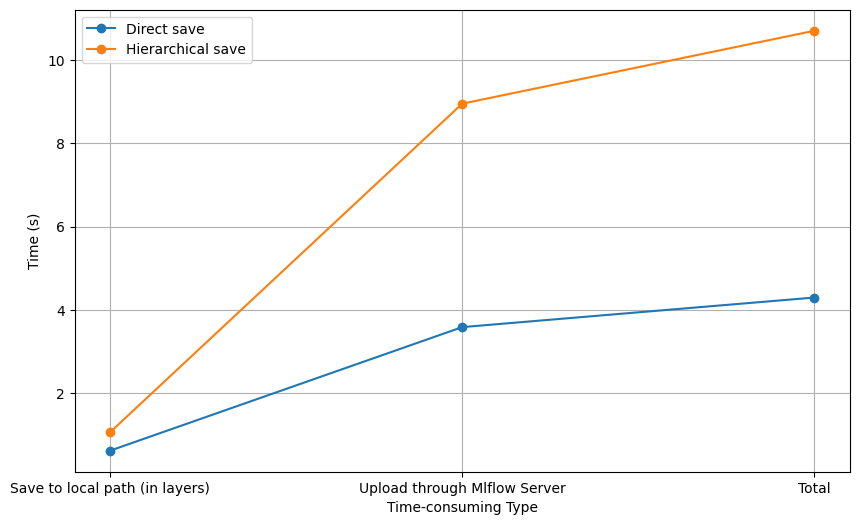

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据
data = {
    "Time-consuming Type": ["Save to local path (in layers)", "Upload through Mlflow Server", "Total"],
    "Direct save": [0.625, 3.59, 4.3],
    "Hierarchical save": [1.065, 8.95, 10.7]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(df["Time-consuming Type"], df["Direct save"], marker='o', label='Direct save')
plt.plot(df["Time-consuming Type"], df["Hierarchical save"], marker='o', label='Hierarchical save')

# 添加标签和图例
plt.xlabel('Time-consuming Type')
plt.ylabel('Time (s)')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

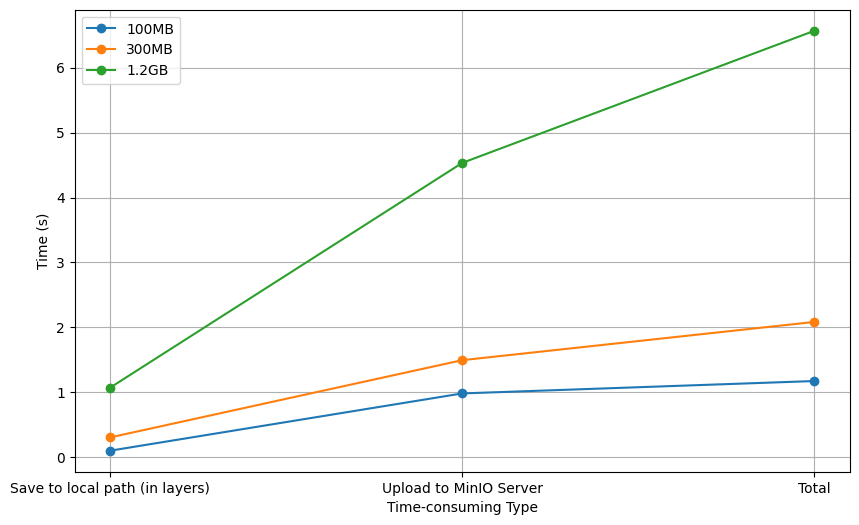

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 数据
data = {
    "Time-consuming Type": ["Save to local path (in layers)", "Upload to MinIO Server", "Total"],
    "100MB": [0.102, 0.984, 1.175],
    "300MB": [0.306, 1.496, 2.085],
    "1.2GB": [1.071, 4.533, 6.568]
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(df["Time-consuming Type"], df["100MB"], marker='o', label='100MB')
plt.plot(df["Time-consuming Type"], df["300MB"], marker='o', label='300MB')
plt.plot(df["Time-consuming Type"], df["1.2GB"], marker='o', label='1.2GB')

# 添加标签和图例
plt.xlabel('Time-consuming Type')
plt.ylabel('Time (s)')
plt.legend()

# 显示网格
plt.grid(True)

# 显示图表
plt.show()

In [6]:
import torch
sd = torch.load('/home/wangsheng/Downloads/resnet-50.bin',map_location=torch.device('cpu'))
len(sd)

320

In [9]:
# To not present the progress bar
import mlflow.environment_variables
mlflow.environment_variables.MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR.default = True
from mlflow.pytorch import load_state_dict, _load_state_dict, _load_state_dict_2
state_dict_uri = "mlflow-artifacts:/1/c1d6ce8641cf4a55a4c0496319fe556c/artifacts"
state_dict_2 = _load_state_dict(state_dict_uri)
len(state_dict_2)

2024/05/27 21:10:55 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


root uri = mlflow-artifacts:/1/c1d6ce8641cf4a55a4c0496319fe556c, artifact_path = artifacts


local path = /tmp/tmp1gvzs9_s/model_info.txt


320

In [8]:
#import importlib
#importlib.reload(model_compose)
import mlflow.environment_variables
mlflow.environment_variables.MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR.default = False
from mlflow.pytorch import load_state_dict, _load_state_dict, _load_state_dict_2


state_dict_uri = "mlflow-artifacts:/1/c1d6ce8641cf4a55a4c0496319fe556c/artifacts"
state_dict_3 = _load_state_dict_2(state_dict_uri)
len(state_dict_3)

local path = /tmp/tmp1y376017/model_info.txt


320

In [7]:
import torch
def compare_state_dicts(state_dict_1, state_dict_2):
    for key in state_dict_1.keys():
        if key in state_dict_2:
            if not torch.allclose(state_dict_1[key], state_dict_2[key]):
                return False
        else:
            return False
    return True


tof = compare_state_dicts(sd, state_dict_3)
if tof == True:
    tof = "same"
else:
    tof = "different"


print(f"state_dict_1 and state_dict_2 are {tof}")


state_dict_1 and state_dict_2 are same


In [10]:
torch.save(sd, "/tmp/pytorch_model.bin")